### Introduction to Neural Network Classification in Tensorflow

In [1]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

2025-03-06 14:38:39.296459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**5. Improving Predictions on Fashion MNIST using normalized data**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [3]:
# creating dictationary of labels:
labels = ['T-shirt/top', 
          'Trouser', 
          'Pullover',
          'Dress',   
          'Coat',    
          'Sandal',  
          'Shirt',   
          'Sneaker', 
          'Bag',     
          'Ankle boot']

In [4]:
# normalizing data
train_data_norm=(train_data-train_data.min())/train_data.max()
test_data_norm=(test_data-test_data.min())/test_data.max()
print(train_data_norm[0].min(),",",train_data_norm[0].max())
print(test_data_norm[0].min(),",",test_data_norm[0].max())

0.0 , 1.0
0.0 , 1.0


In [5]:
# one-hot encode labels
train_labels_ohe=tf.one_hot(train_labels,len(labels))
print(train_labels_ohe[:5])
test_labels_ohe=tf.one_hot(test_labels,len(labels))
print(test_labels_ohe[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [6]:
# creating a model

class FashionNet(kr.Model):
    def __init__(self,lr=0.001,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[28,28],name='input_layer')
        
        # flattening the input
        self.flatten=kr.layers.Flatten(input_shape=(28,28),name='flatten')

        # hidden layer:
        self.fc1 = kr.layers.Dense(4,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(4,activation=None,name='hl2')
        # self.fc3 = kr.layers.Dense(4,activation=None,name='hl3')

        # output layer
        self.output_layer=kr.layers.Dense(10,activation=None,name='output_layer')


        # other hyper-params
        self.loss_function="categorical_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=self.flatten(inputs)
        x=tf.nn.relu(self.fc1(x))
        x=tf.nn.relu(self.fc2(x))
        # x=tf.nn.relu(self.fc3(x))
        output=tf.nn.softmax(self.output_layer(x))
        return output

**7. Finding ideal learning rate for Fashion MNIST**

In [7]:
model_1=FashionNet(model_name='model_1')
model_1(tf.keras.Input(shape=[28,28]))
model_1.compile(loss=model_1.loss_function,optimizer=model_1.optimizer,metrics=model_1.eval_metrics)
model_1.summary()

# creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:(1e-4)*(10**(epoch/20)))

history_1=model_1.fit(train_data_norm,
                      train_labels_ohe,
                      epochs=100,
                      callbacks=[lr_scheduler],
                      validation_data=(test_data_norm,test_labels_ohe) 
                      )

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2452 - loss: 2.1604 - val_accuracy: 0.3871 - val_loss: 1.8606 - learning_rate: 1.0000e-04
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3905 - loss: 1.7909 - val_accuracy: 0.3665 - val_loss: 1.5904 - learning_rate: 1.1220e-04
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3728 - loss: 1.5215 - val_accuracy: 0.4149 - val_loss: 1.3644 - learning_rate: 1.2589e-04
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4412 - loss: 1.3214 - val_accuracy: 0.5089 - val_loss: 1.2279 - learning_rate: 1.4125e-04
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5546 - loss: 1.1683 - val_accuracy: 0.6844 - val_loss: 1.0083 - learning_rate: 1.5849e-04
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7046 - loss: 0.9512 - val_accuracy: 0.7355 - val_loss: 0.8412 - learning_rate: 1.7783e-04
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 

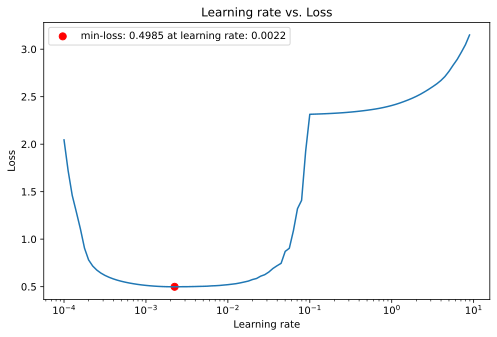

In [8]:
# plotting learning rate vs loss
epochs=100
lrs=1e-4*(10**(tf.range(epochs)/20))
plt.figure(figsize=(8,5))
plt.semilogx(lrs,history_1.history["loss"])
# min loss:
loc=tf.argmin(history_1.history["loss"]).numpy()
x=lrs[loc]
y=min(history_1.history["loss"])
plt.scatter(x,y,s=50,color=(1.0,0,0),label=f'min-loss: {np.round(y,4)} at learning rate: {np.round(x,4)}')
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.legend()
plt.title("Learning rate vs. Loss")
plt.show()

In [9]:
ideal_lr=lrs[loc].numpy()
print(loc)
print(ideal_lr)

27
0.0022387211385683403


In [10]:
# refitting model with ideal learning rate
# training a model with an ideal learning rate:
# ideal_lr=lrs[loc].numpy()
model_2 = FashionNet(model_name='model_2',lr=0.001)
model_2(tf.keras.Input(shape=[28,28]))  
model_2.compile(loss=model_2.loss_function,optimizer=model_2.optimizer,metrics=model_2.eval_metrics)
model_2.summary()
history_2=model_2.fit(train_data_norm,train_labels_ohe,epochs=20,validation_data=(test_data_norm,test_labels_ohe))

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3649 - loss: 1.7155 - val_accuracy: 0.6708 - val_loss: 0.9630
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6901 - loss: 0.8947 - val_accuracy: 0.7304 - val_loss: 0.7986
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7394 - loss: 0.7588 - val_accuracy: 0.7534 - val_loss: 0.7211
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7622 - loss: 0.6862 - val_accuracy: 0.7629 - val_loss: 0.6844
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7739 - loss: 0.6507 - val_accuracy: 0.7691 - val_loss: 0.6651
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7816 - loss: 0.6306 - val_accuracy: 0.7747 - val_loss: 0.6535
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7869 - loss: 0.6170 - val_accuracy: 0.7771 - val_loss: 0.6458
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7912 - loss: 0.6066 - 

**8. Evaluating trained model on Fashion MNIST**

* Evaluate using Confusion Matrix
* Assess some of its predictions (through visualization)
* Save an export the model

In [14]:
import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

from important_functionalities import plot_confusion_matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred=model_2.predict(test_data_norm,verbose=0)

# print(test_labels[:10])
# print()
# print(y_pred[:10])

# # we need to convert predictions from probabilities to classes
cm=confusion_matrix(test_labels,tf.argmax(y_pred,axis=1))
cm

array([[716,  12,  13,  69,   9,   1, 165,   0,  15,   0],
       [  0, 951,   6,  25,  13,   0,   3,   0,   2,   0],
       [ 15,   6, 663,   8, 175,   0, 127,   0,   6,   0],
       [ 33,  41,   5, 796,  45,   3,  73,   0,   4,   0],
       [  0,   7, 169,  21, 685,   4, 107,   0,   7,   0],
       [  0,   0,   0,   3,   1, 839,   2,  97,  15,  43],
       [121,  10, 124,  34, 121,   2, 561,   0,  27,   0],
       [  0,   0,   0,   0,   0,  57,   0, 914,   1,  28],
       [  0,   0,   1,   8,   7,  30,  45,   4, 902,   3],
       [  0,   0,   0,   0,   1,  18,   0,  55,   1, 925]])

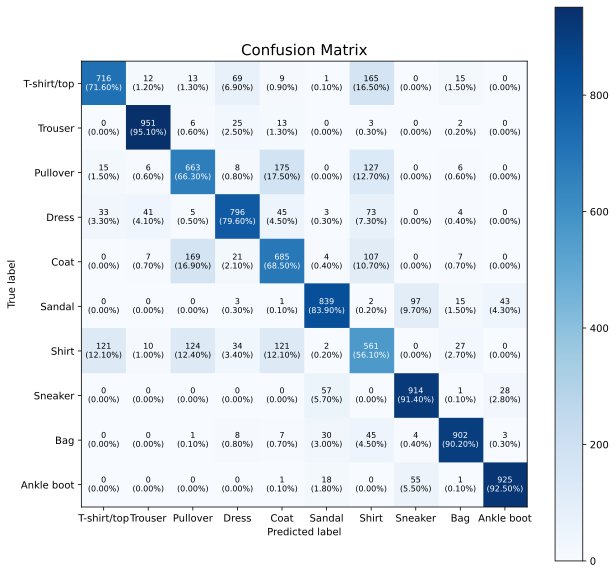

In [17]:
plot_confusion_matrix(cm,classes=labels,figsize=(10,10),text_size=8)

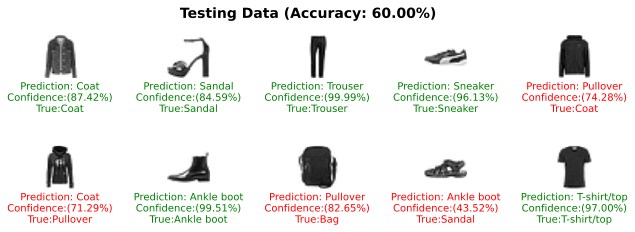

In [83]:
# visualizing predictions:

# selecting 5 images randomly 
local_seed=np.random.randint(low=0,high=100)

locs_test=tf.random.uniform(minval=0,maxval=len(test_data),shape=(10,),dtype=tf.int32,seed=local_seed).numpy()

preds_probability=model_2.predict(test_data_norm[locs_test],verbose=0)
preds=tf.argmax(preds_probability,axis=1)

def prettify(ax):
    ax.set_xticks([])  # Hide x-axis
    ax.set_yticks([])  # Hide y-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# visualizing the dataset

# test data
fig,axs=plt.subplots(2,5,figsize=(10,3))
for i, ax in enumerate(axs.flat):  # Flatten the (2,5) grid
    ax.imshow(test_data[locs_test[i]], cmap=plt.cm.binary)
    ax.set_xlabel(f'Prediction: {labels[preds[i]]}\nConfidence:({preds_probability[i][preds[i]]*100:.2f}%)\nTrue:{labels[test_labels[locs_test[i]]]}',color='green' if preds[i] == test_labels[locs_test[i]] else 'red')
    prettify(ax)

_,accuracy=model_2.evaluate(test_data_norm[locs_test],test_labels_ohe.numpy()[locs_test],verbose=0)
fig.suptitle(f"Testing Data (Accuracy: {accuracy*100:.2f}%)",fontsize=14,fontweight='bold')
# plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace=2) 
plt.show()

***-- CONTD IN NEXT NOTEBOOK --***